In [4]:
import os
import re

import dlib
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = "./data"

In [34]:
def open_img(name):
    img = cv2.imread(os.path.join(path, name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def show_img(img, figsize=(7, 14)):
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.show()

In [35]:
me = open_img("me.jpg")
crowd = open_img("asians.jpg")

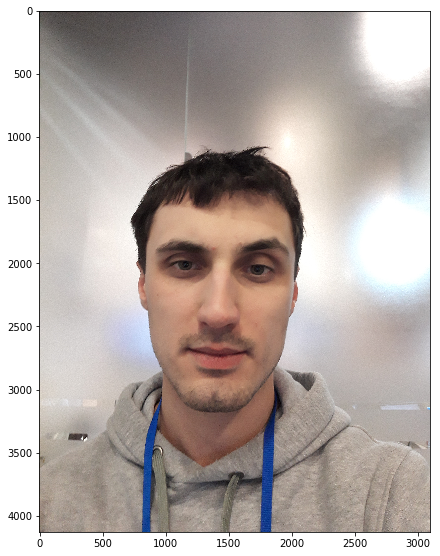

In [36]:
show_img(me)

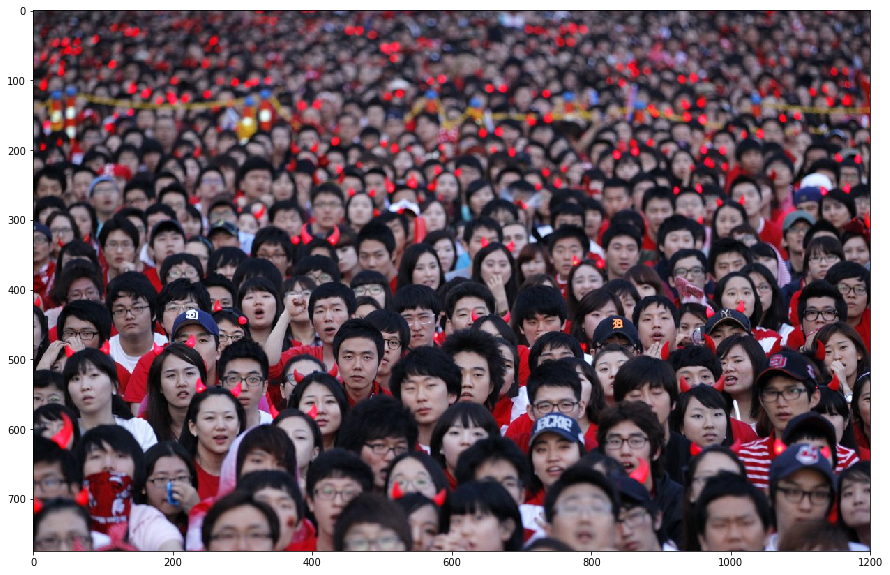

In [38]:
show_img(crowd, figsize=(15, 25))

In [43]:
#face_detector = dlib.cnn_face_detection_model_v1("./data/mmod_human_face_detector.dat")
face_detector = dlib.get_frontal_face_detector()

def crop_face(img):
    faces_cnn = face_detector(img, 1)
    offset = 10
    imgs = []
    for face in faces_cnn:
        x = face.rect.left()
        y = face.rect.top()
        w = face.rect.right() - x
        h = face.rect.bottom() - y

        x = max(offset, x - x // 2)
        y = max(offset, y - y // 2)
        w = min(img.shape[0]-offset, w + w // 2) + x
        h = min(img.shape[1]-offset, h + h // 2) + y
        imgs.append(img[y:y+h, x:x+w])
    return imgs

In [48]:
def face_detection(img):
    # Ask the detector to find the bounding boxes of each face. The 1 in the
    # second argument indicates that we should upsample the image 1 time. This
    # will make everything bigger and allow us to detect more faces.
    detector = dlib.get_frontal_face_detector()
    faces = detector(img, 1)
    return faces

In [49]:
bboxs = []

for face in face_detection(crowd):
    bboxs.append((face.left(), face.top(), face.right(), face.bottom()))

In [50]:
bboxs

[(432, 481, 494, 543),
 (867, 429, 919, 481),
 (821, 326, 872, 378),
 (519, 511, 594, 586),
 (232, 564, 294, 626),
 (937, 564, 999, 626),
 (976, 487, 1028, 539),
 (988, 389, 1039, 441),
 (640, 353, 684, 396),
 (1126, 470, 1178, 522),
 (449, 270, 485, 306),
 (545, 358, 581, 394),
 (391, 412, 453, 474),
 (273, 509, 335, 571),
 (187, 504, 239, 556),
 (740, 331, 792, 383),
 (377, 543, 439, 605),
 (751, 694, 826, 768),
 (169, 158, 205, 194),
 (103, 324, 146, 367),
 (400, 266, 443, 310),
 (770, 372, 813, 415),
 (45, 509, 107, 571),
 (819, 599, 881, 661),
 (967, 710, 1042, 785),
 (107, 412, 170, 474),
 (602, 418, 654, 470),
 (162, 652, 237, 727),
 (1033, 519, 1108, 594),
 (1151, 675, 1213, 737),
 (557, 282, 593, 318),
 (817, 258, 853, 294),
 (1103, 418, 1155, 470),
 (296, 395, 348, 447),
 (1161, 334, 1197, 370),
 (710, 602, 784, 677),
 (1149, 383, 1201, 435),
 (710, 544, 784, 619),
 (21, 306, 57, 342),
 (573, 238, 609, 274),
 (305, 230, 341, 266),
 (406, 671, 458, 723),
 (1061, 664, 1151, 753